In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pyarrow

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

sns.set_style("white")
plt.rcParams['figure.dpi'] = 300

In [2]:
eng_stats_df = pd.read_feather("Award_Batting_HOF_FE.feather")

In [3]:
# X = eng_stats_df[['Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total', 'BattingPost_df_G_avg', 'BattingPost_df_G_total', 'BattingPost_df_AB_avg', 'BattingPost_df_AB_total', 'BattingPost_df_R_avg', 'BattingPost_df_R_total', 'BattingPost_df_H_avg', 'BattingPost_df_H_total', 'BattingPost_df_2B_avg', 'BattingPost_df_2B_total', 'BattingPost_df_3B_avg', 'BattingPost_df_3B_total', 'BattingPost_df_HR_avg', 'BattingPost_df_HR_total', 'BattingPost_df_RBI_avg', 'BattingPost_df_RBI_total', 'BattingPost_df_SB_avg', 'BattingPost_df_SB_total', 'BattingPost_df_CS_avg', 'BattingPost_df_CS_total', 'BattingPost_df_BB_avg', 'BattingPost_df_BB_total', 'BattingPost_df_SO_avg', 'BattingPost_df_SO_total', 'BattingPost_df_IBB_avg', 'BattingPost_df_IBB_total', 'BattingPost_df_HBP_avg', 'BattingPost_df_HBP_total', 'BattingPost_df_SH_avg', 'BattingPost_df_SH_total', 'BattingPost_df_SF_avg', 'BattingPost_df_SF_total', 'BattingPost_df_GIDP_avg', 'BattingPost_df_GIDP_total']]
# y = eng_stats_df['HallOfFame_df_inducted']

X = eng_stats_df[[
    'years_played', 'total_games', 'total_at_bats', 'total_runs', 'total_hits',
    'total_walks', 'total_doubles', 'total_triples', 'total_home_runs',
    'total_RBI', 'total_SB', 'total_CS', 'total_BB', 'total_SO', 'total_IBB',
    'total_HBP', 'total_SH', 'total_SF', 'total_GIDP', 'max_HR', 'max_hits',
    'max_SB', 'total_singles', 'batting_avg', 'OBP', 'SLG', 'OPS'
]].fillna(0)  # Replace NaNs with 0

# Ensure the target variable has no missing values
y = eng_stats_df['HOF_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlpc_model_1 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
mlpc_model_1.fit(X_train_scaled, y_train)

y_pred = mlpc_model_1.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Reset indices for alignment
y_test_reset = y_test.reset_index(drop=True)
y_pred_reset = pd.Series(y_pred, index=y_test_reset.index)

# Identify false positives and false negatives
false_positives = y_test_reset[(y_test_reset == 0) & (y_pred_reset == 1)].index
false_negatives = y_test_reset[(y_test_reset == 1) & (y_pred_reset == 0)].index

# Extract player details for false positives and false negatives
false_positive_players = eng_stats_df.loc[false_positives, ['playerID', 'HOF_status']]
false_negative_players = eng_stats_df.loc[false_negatives, ['playerID', 'HOF_status']]

# Display the results
print("\nFalse Positives:")
print(false_positive_players)

print("\nFalse Negatives:")
print(false_negative_players)


Confusion Matrix:
[[526   8]
 [  6  40]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       534
         1.0       0.83      0.87      0.85        46

    accuracy                           0.98       580
   macro avg       0.91      0.93      0.92       580
weighted avg       0.98      0.98      0.98       580


False Positives:
Empty DataFrame
Columns: [playerID, HOF_status]
Index: []

False Negatives:
Empty DataFrame
Columns: [playerID, HOF_status]
Index: []


c:\Users\ctroop\AppData\Local\csc5610base\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


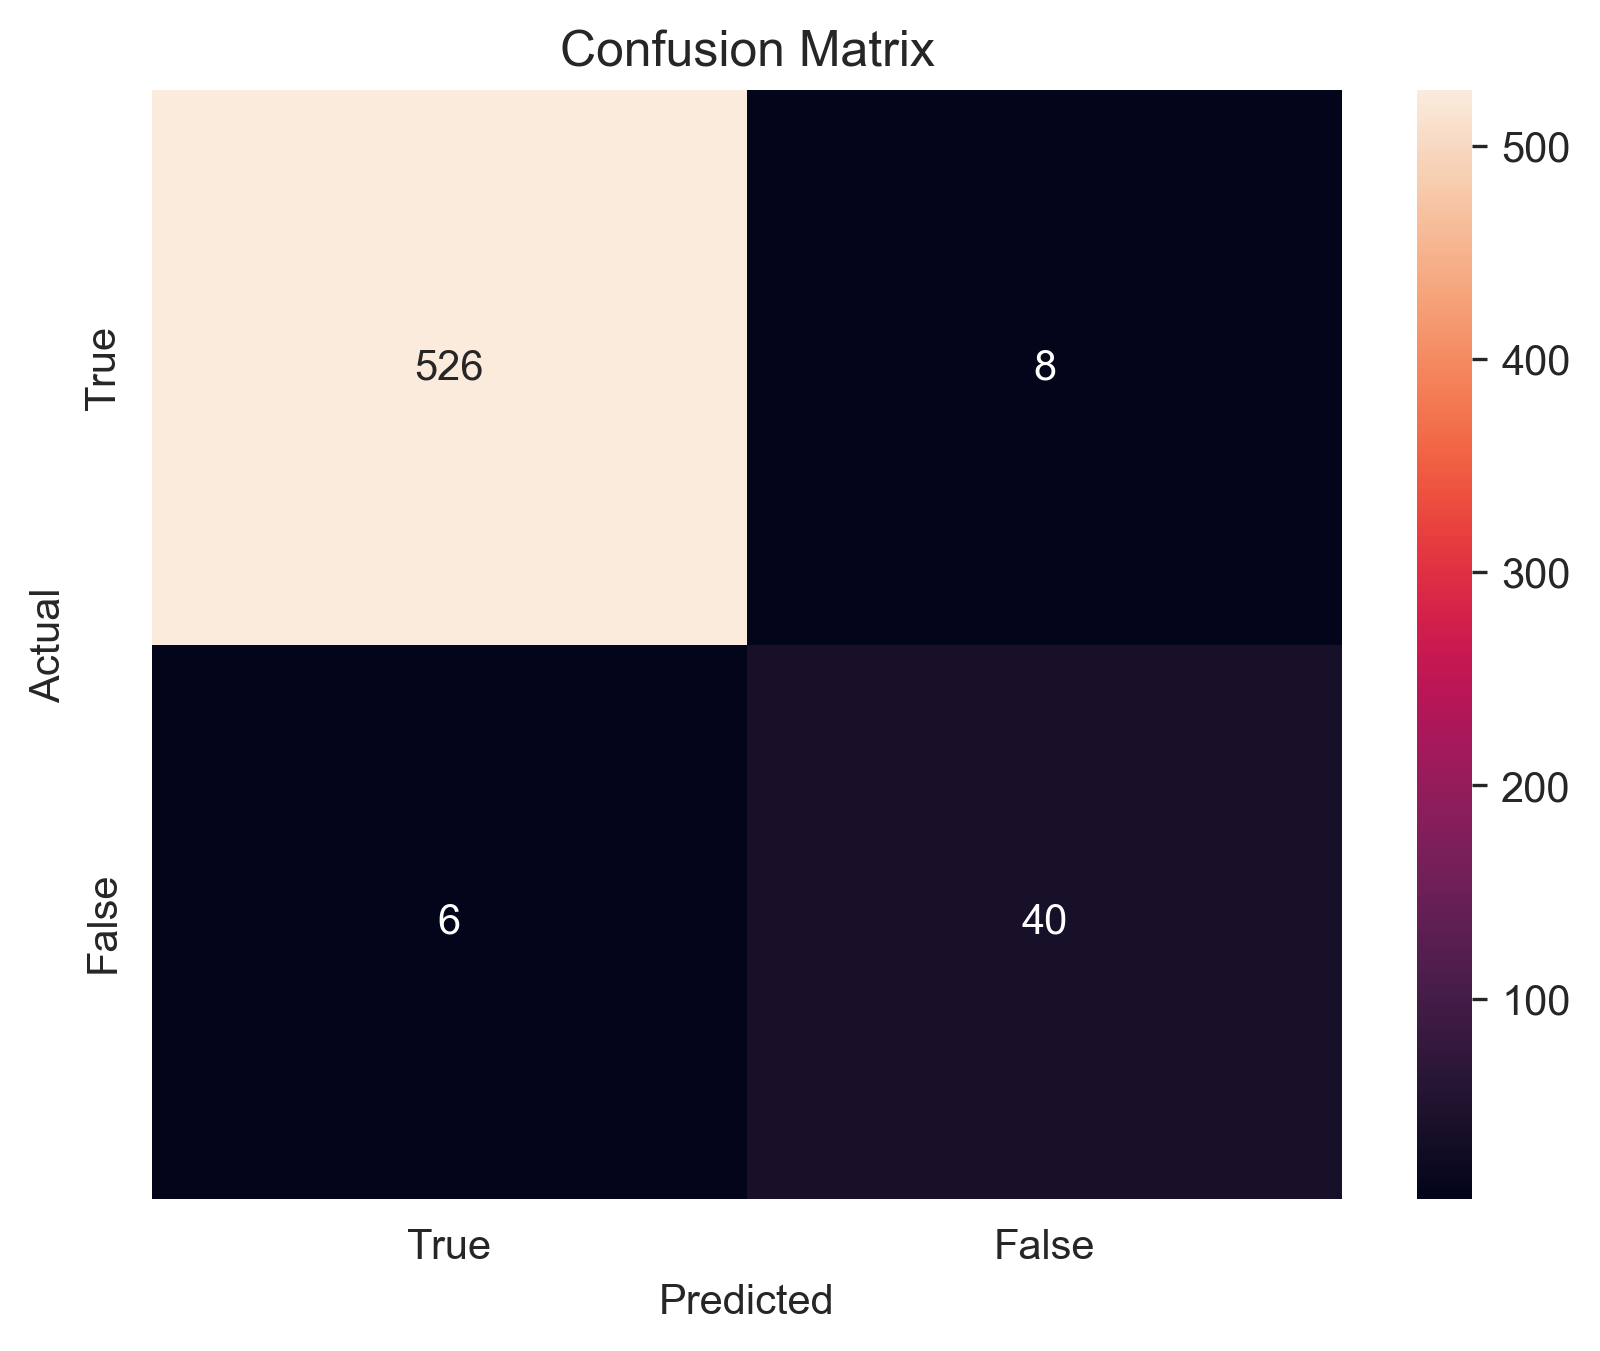

<Figure size 1920x1440 with 0 Axes>

In [4]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.savefig('mlpc_model_1.png')